In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
dt = pd.read_csv('insurance.csv')
dt

/home/student/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


In [2]:
dt.shape

(1338, 7)

In [3]:
dt.describe()

,age,bmi,children,charges
count,1335.000000,1334.000000,1335.000000,1338.000000
mean,39.214232,30.665390,1.094382,13270.422265
std,14.051488,6.098268,1.206587,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
dt.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
dt.eq(0).any()

age         False
sex         False
bmi         False
children     True
smoker      False
region      False
charges     False
dtype: bool

In [6]:
dt.isnull().sum()

age         3
sex         0
bmi         4
children    3
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#data replacements

In [8]:
dt['age'].fillna(dt['age'].median(),inplace=True)
dt['bmi'].fillna(dt['bmi'].mean(),inplace=True)
dt['children'].fillna(dt['children'].mode()[0],inplace=True)

In [9]:
dt.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [11]:
dt.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
dt.mean(numeric_only=True)

age            39.213752
bmi            30.665390
children        1.091928
charges     13270.422265
dtype: float64

In [13]:
dt.median(numeric_only=True)

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [14]:
dt.mode(numeric_only=True)

,age,bmi,children,charges
0,18.0,32.3,0.0,1639.5631


In [15]:
#Subsets

In [16]:
dt.iloc[100:200, 0:2]

,age,sex
100,41.0,female
101,30.0,male
102,18.0,female
103,61.0,female
104,34.0,female
...,...,...
195,19.0,male
196,39.0,female
197,45.0,female
198,51.0,female


In [17]:
dt[['age','charges']].iloc[:100]

,age,charges
0,19.0,16884.92400
1,18.0,1725.55230
2,28.0,4449.46200
3,33.0,21984.47061
4,32.0,3866.85520
...,...,...
95,28.0,3766.88380
96,54.0,12105.32000
97,55.0,10226.28420
98,56.0,22412.64850


In [18]:
dt[dt['age']==29]

,age,sex,bmi,children,smoker,region,charges
76,29.0,female,29.590,1.0,no,southeast,3947.41310
108,29.0,male,27.940,0.0,no,southeast,2867.11960
117,29.0,female,27.940,1.0,yes,southeast,19107.77960
143,29.0,male,29.735,2.0,no,northwest,18157.87600
145,29.0,female,38.830,3.0,no,southeast,5138.25670
189,29.0,female,32.110,2.0,no,northwest,4922.91590
249,29.0,male,28.975,1.0,no,northeast,4040.55825
291,29.0,male,29.640,1.0,no,northeast,20277.80751
305,29.0,male,33.345,2.0,no,northwest,19442.35350
324,29.0,male,27.200,0.0,no,southwest,2866.09100


In [19]:
dt[(dt['sex']=='female')&(dt['age']<=20)].iloc[:10]

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
31,18.0,female,26.315,0.0,no,northeast,2198.18985
32,19.0,female,28.600,5.0,no,southwest,4687.79700
46,18.0,female,38.665,2.0,no,northeast,3393.35635
50,18.0,female,35.625,0.0,no,northeast,2211.13075
64,20.0,female,22.420,0.0,yes,northwest,14711.74380
65,19.0,female,28.900,0.0,no,southwest,1743.21400
102,18.0,female,30.115,0.0,no,northeast,21344.84670
106,19.0,female,28.400,1.0,no,southwest,2331.51900
122,20.0,female,28.975,0.0,no,northwest,2257.47525


In [20]:
#plots

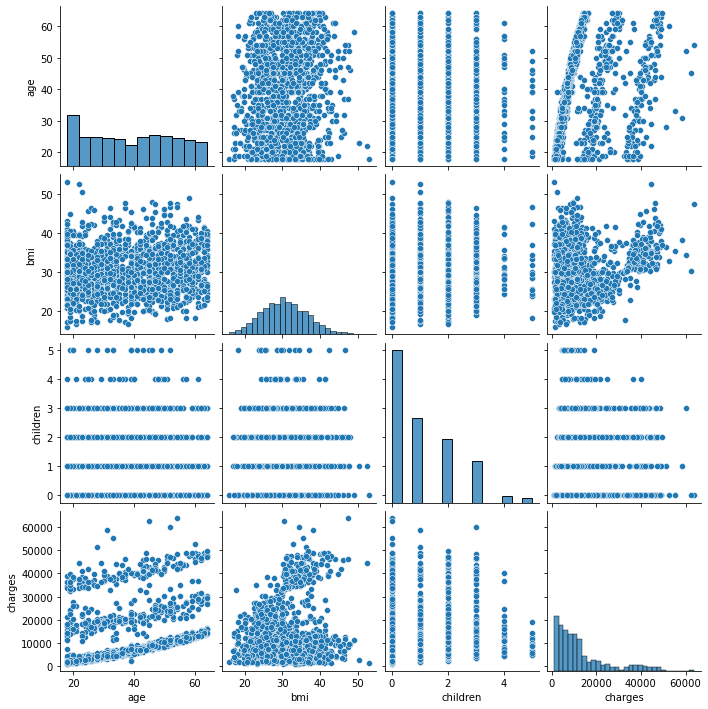

In [21]:
sns.pairplot(dt)

In [22]:
xdt=dt[(dt['age']>35)&(dt['age']<45)]

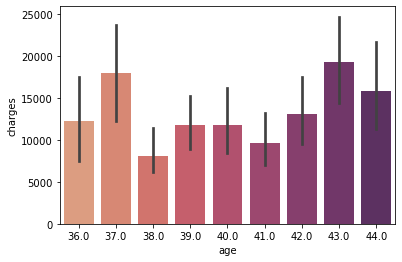

In [23]:
sns.barplot(data=dt, x=xdt['age'], y=dt['charges'],palette='flare')
plt.show()

<AxesSubplot:xlabel='age', ylabel='charges'>

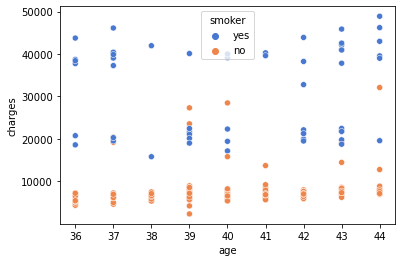

In [24]:
sns.scatterplot(data=dt, x=xdt['age'], y=dt['charges'],palette='muted',hue=dt['smoker'])

In [25]:
#sns.boxplot(dt,x=dt['charges'])

In [26]:
#Splitting training and testing data

In [27]:
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

In [28]:
np.array(dt['age']).shape

(1338,)

In [29]:
np.array(dt['age']).reshape(-1, 1).shape

(1338, 1)

In [30]:
x = np.array(dt['age']).reshape(-1,1)
y = np.array(dt['charges']).reshape(-1,1)
x_tr, x_te, y_tr, y_te = train_test_split(x,y, test_size = 0.25)

In [31]:
regr = LinearRegression()

In [32]:
regr.fit(x_tr, y_tr)

LinearRegression()

In [33]:
y_predict=regr.predict(x_te)


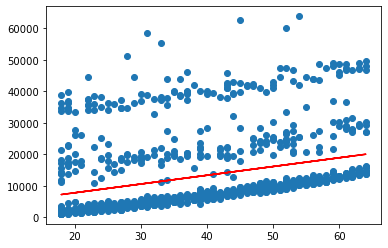

In [34]:
plt.scatter(x_tr, y_tr)
plt.plot(x_tr, regr.predict(x_tr), color='red')
plt.show()

In [35]:
from sklearn import metrics

In [36]:
#MAE
metrics.mean_absolute_error(y_te,y_predict)

8973.225665651353

In [37]:
#MSE
metrics.mean_squared_error(y_te,y_predict)

131371617.98318517

In [38]:
#NMSE
np.sqrt(metrics.mean_squared_error(y_te,y_predict))

11461.745852320455

In [39]:
metrics.r2_score(y_te,y_predict)

0.046753534148817

In [40]:
regr.predict([[28]]) # charges = 4449.46200 for age = 28

array([[10036.60947232]])

In [41]:
#Label encoding and onehot encoding

In [42]:
le = LabelEncoder()
dt['sex'] = le.fit_transform(dt['sex'])
dt['smoker'] = le.fit_transform(dt['smoker'])

In [43]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
arr=enc.fit_transform(dt[['region']])

In [44]:
reg=pd.DataFrame(arr, columns=enc.get_feature_names_out(['region']))
reg.columns

Index(['region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [45]:
dt=pd.concat([dt,reg],axis=1)
#dt.drop(['region'],axis=1,inplace=True)

In [46]:
dt.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [47]:
dt

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0,27.900,0.0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18.0,1,33.770,1.0,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28.0,1,33.000,3.0,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33.0,1,22.705,0.0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32.0,1,28.880,0.0,0,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3.0,0,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18.0,0,31.920,0.0,0,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18.0,0,36.850,0.0,0,southeast,1629.83350,0.0,0.0,1.0,0.0
1336,21.0,0,25.800,0.0,0,southwest,2007.94500,0.0,0.0,0.0,1.0


In [48]:
#Normalization

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [50]:
dt.head()

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0,27.900,0.0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18.0,1,33.770,1.0,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28.0,1,33.000,3.0,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33.0,1,22.705,0.0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32.0,1,28.880,0.0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


In [51]:
A = dt[['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].values
B = dt['charges'].values.reshape(-1,1)
normA = scaler.fit_transform(A)
A_tr, A_te, B_tr, B_te = train_test_split(normA,B, test_size = 0.25)

In [52]:
normRegr = LinearRegression()
normRegr.fit(A_tr, B_tr)
B_predict= normRegr.predict(A_te)

In [53]:
#MAE
metrics.mean_absolute_error(B_te,B_predict) 
# Previous MAE = 8988.072725393851
# Current MAE = 3890.271295434944

4209.6468005822735

In [54]:
#MSE
metrics.mean_squared_error(B_te,B_predict)
#Previous MSE = 129335384.21735895
#32481107.911177725

36631102.26311015

In [55]:
#NMSE
np.sqrt(metrics.mean_squared_error(B_te,B_predict))
#Previous NMSE = 11372.571574510268
#5699.21993883178

6052.363361787704

In [56]:
metrics.r2_score(B_te,B_predict)

0.7668669379764882

In [57]:
A_te.shape

(335, 9)

In [58]:
A_te[[4]]

array([[0.82608696, 1.        , 0.26836158, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        ]])

In [59]:
B_te[4]

array([11165.41765])

In [60]:
normRegr.predict(A_te[[4]])

array([[11050.31843758]])

In [61]:
y_predicted=normRegr.predict([[28,0,33,3,0,0,0,1,0]])

In [62]:
y_predicted

array([[734506.83872157]])

In [66]:
olsY = dt['age']
olsX = dt['charges']
olsX = sm.add_constant(olsX)
model = sm.OLS(olsY,olsX)
results = model.fit()
results.params

const      34.640995
charges     0.000345
dtype: float64